In [1]:
# !pip install tensorflow_datasets

In [2]:
from __future__ import absolute_import, division, print_function

# Import tensorflow and tensorflow datasets
import tensorflow as tf
import tensorflow_datasets as tfds


# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Improve the progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

2.12.0


In [3]:
datasets, metadata = tfds.load('fashion_mnist', as_supervised= True, with_info = True)
train_dataset, test_dataset = datasets['train'], datasets['test']

In [4]:
# Now lets create a list to make it readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

# Explore The Data

In [5]:
# Lets explore the format of the dataset before training the data

num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print(f"Number of training examples : {num_train_examples}")
print(f"Number of test examples : {num_test_examples}")

Number of training examples : 60000
Number of test examples : 10000


# Preprocess the data

In [6]:
# The value of each pixel in the image data is an integer in the range (o, 255), so for the model to function properly we need to normalize them between range (0, 1)

def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies to the normalize funtion of each element in the train and in the test datasets
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

# Explore the processed data

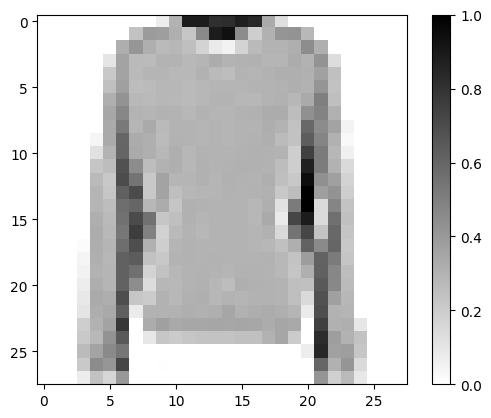

In [7]:
import numpy as np
# Lets plot the image and see what it looks like

# Take a simgle image, remove the color dimension by reshaping it
for image, label in train_dataset.take(1):
  break
image = image.numpy().reshape((28, 28))

# Plot the image
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

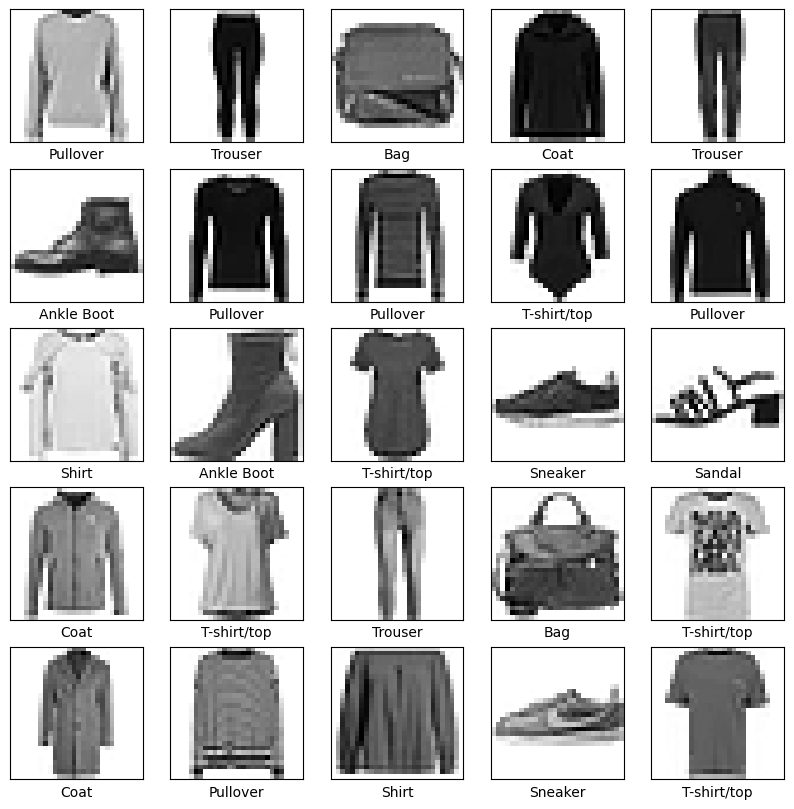

In [8]:
# Lets display for 25 images

plt.figure(figsize = (10, 10))
i = 0
for image, label in train_dataset.take(25):
  image = image.numpy().reshape((28, 28 ))

  plt.subplot(5, 5, i + 1)
  plt.imshow(image, cmap = plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.xlabel(class_names[label])
  i += 1
plt.show()

# Build the model
Building the neural network model requirs configuring the layers of the model and compiling the model

In [9]:
# Don't forget that the layers must be passed into a list in the sequential bracket

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = ((28, 28, 1))),
    tf.keras.layers.Dense(units = 128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

# Compile the model

In [10]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train the model

In [11]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [12]:
model.fit(train_dataset, epochs = 5, steps_per_epoch= np.ceil(num_train_examples/ BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 20s 5ms/step - loss: 0.4979 - accuracy: 0.8246
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3771 - accuracy: 0.8638
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3336 - accuracy: 0.8774
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3093 - accuracy: 0.8864
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2920 - accuracy: 0.8927


# Evaluate accuracy

In [13]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps = np.ceil(num_test_examples/BATCH_SIZE))
print(f"Accuracy on the test set {test_accuracy}")

313/313 [==============================] - 2s 5ms/step - loss: 0.3414 - accuracy: 0.8750
Accuracy on the test set 0.875


# Make Predictions and explore

In [17]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  prediction = model.predict(test_images)

1/1 [==============================] - 0s 17ms/step


In [18]:
prediction.shape

(32, 10)

In [22]:
# Lets take a look at the first prediction
prediction[0] # So this is the prediction of the first image

array([8.1429978e-05, 1.3169569e-07, 9.1052903e-03, 2.4784604e-05,
       9.2608231e-01, 3.4982166e-09, 6.4687625e-02, 1.6101875e-07,
       1.8214887e-05, 1.5177514e-08], dtype=float32)

The prrdiction is an array of 10 numbers, this describe the confidence of the model that the image corresponds to each of the 10 different articles of clothing, we can see which label has the heighest confidence value

In [23]:
# To know the heighest value
np.argmax(prediction[0])

4

In [25]:
# Lets check the corresponding labels in our test dataset
test_labels[0]

4

# Plot Graphs

In [35]:
def plot_images(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap = plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  color = ""
  if predicted_label == true_label:
    color == 'blue'
  else:
    color == 'red'

  # plt.xlabel("{} {:.2.0f} {}".format(class_names[predicted_label],
  #                                    100* np.max(predictions_array),
  #                                    class_names[true_label],
  #                                    color = color))
  plt.xlabel(f"{class_names[predicted_label]} {100* np.max(predictions_array):2.0f}% {class_names[true_label]}")

def plot_value_array(i, prediction_array, true_label):
  prediction_array, true_label = prediction_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  this_plot = plt.bar(range(10), prediction_array, color = "#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(prediction_array)

  this_plot[predicted_label].set_color('red')
  this_plot[true_label].set_color('blue')


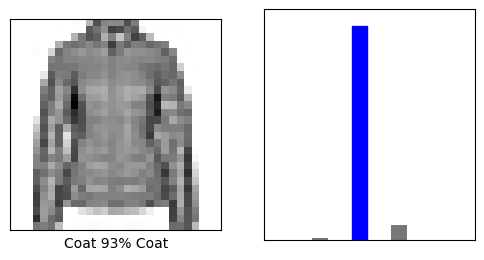

In [36]:
# Lets look at the first prediction
i = 0
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_images(i, prediction, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, prediction, test_labels)

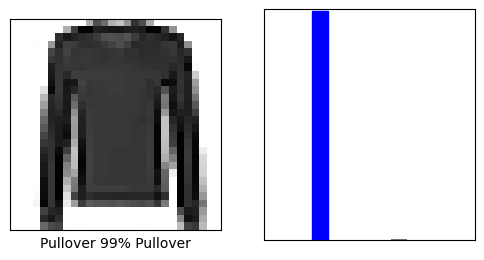

In [37]:
i = 12
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_images(i, prediction, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, prediction, test_labels)

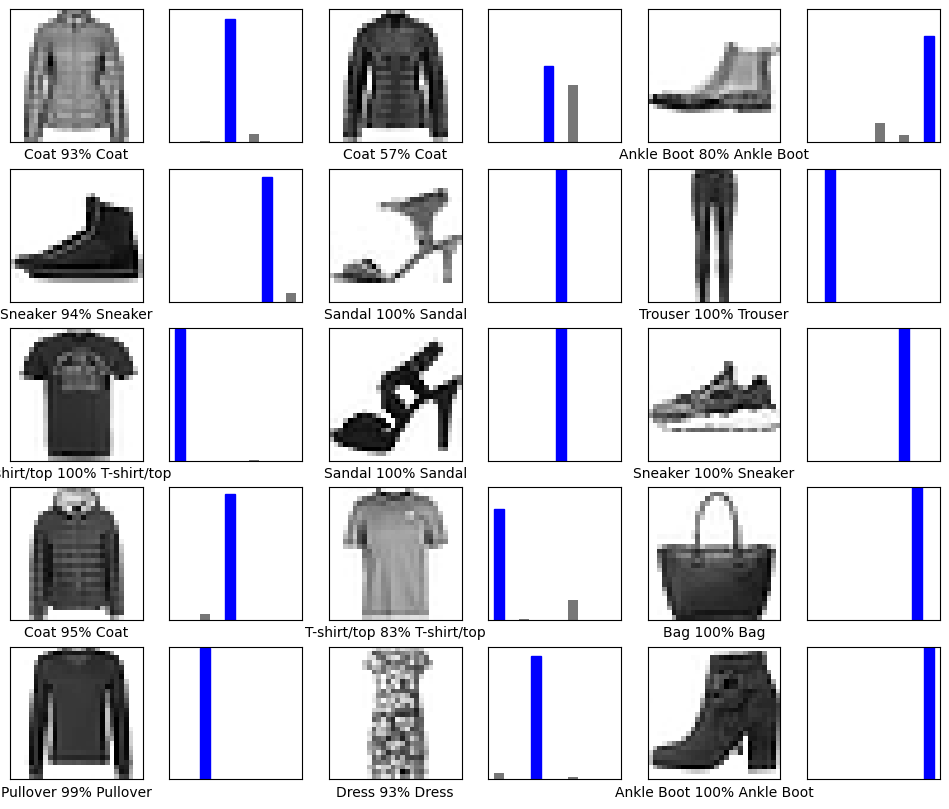

In [44]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_images(i, prediction, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction, test_labels)


Finally, use the trained model to make a prediction about a single image.

In [45]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


# Add an image batch to it

In [48]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 1, 1, 28, 28, 1)


# Now predict the image

In [49]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 91ms/step
[[8.1430044e-05 1.3169594e-07 9.1052977e-03 2.4784647e-05 9.2608219e-01
  3.4982228e-09 6.4687707e-02 1.6101873e-07 1.8214885e-05 1.5177514e-08]]


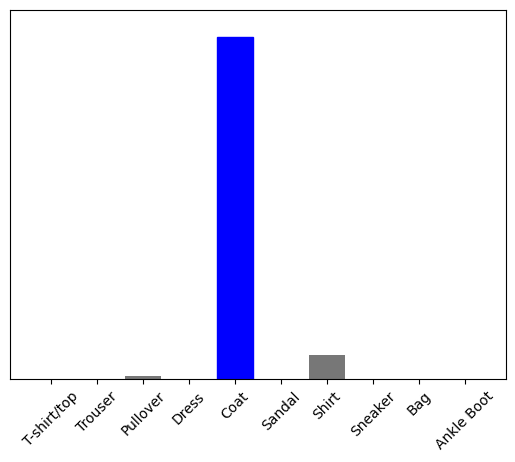

In [50]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [51]:
np.argmax(predictions_single[0])

4